In [32]:
import os
from graphviz import Source
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
#Before importing export_graphviz, make sure that you've installed it via 
#this command in terminal: "conda install python-graphviz"
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#To make the notebook's output stabel across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path to saving images
IMAGE_PATH = os.path.join("images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension ,dpi=resolution)

Decision Trees can perform both classification, regression tasks and even multioutput tasks. Furthermore, they're capable of fitting complex datasets. <br>
We'll be starting with how to train -> visualize -> predictions with Decision Trees. Then go through the CART training algorithm used by Scikit Learn -> regularize trees -> use trees for regression tasks. <br>
Finally, we'll have a look at the limitation of Decision Trees

# Section: Training And Visualizing A Decision Tree

The following trains a DecisionTreeClassifier on the iris dataset

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Let's visualize the trained Decision Tree by using the export_graphviz() method. It outputs a filled called <em>iris_tree.dot</em>

Figure 6-1


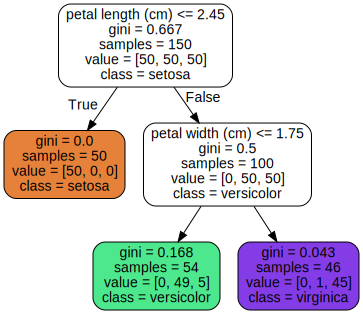

In [3]:
export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGE_PATH, "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
print("Figure 6-1")
Source.from_file(os.path.join(IMAGE_PATH, "iris_tree.dot"))
#To convert the .dot file to a png use this following command in the terminal,
#make sure that you're in the same folder as the .dot file: 
# "$ dot -Tpng iris_tree.dot -o iris_tree.png"

# End Of Section: Training And Visualizing A Decision Tree

# Section: Making Predictions

The tree illustrated on figure 6-1 shows how a prediction is represented. To classify a flower, you start at the top, which is the <em>root node</em> (depth 0). Then the process is as follows:
<ul>
    <li>The top node asks whether the flower's petal is smaller than 2.45cm.</li>
    <li>Depending on the answer, you move down the tree (depth 1) to the root's child node until you reach a predicted class node. In the case that a child node doesn't have any child nodes, it's called a <em>leaf node</em></li>
</ul>

<strong>Note</strong>, Decision Trees require very little data preparation. An aspect of that is they don't require feature scaling or centering

Let's define the following to get a better understanding of what a node consists of:
<ul>
    <li><strong>Samples</strong> counts how many training instances it applies to. I.g, 100 training instances have a petal length greater than 2.45cm</li>
    <li><strong>Value</strong> tells how many training instances of each class this node applies to. I.g, the bottom right node applies to 0 "Iris Setosa", 1 "Iris Versicolor" and 45 "Iris Verginica"</li>
    <li><strong>Gini</strong> measure <em>impurity</em>, a node is "pure" (gini = 0) if all training instances it applies to belong to the same class </li>
</ul>

To get a <strong>gini</strong> we apply equation 6-1 to the left node that's in depth =2 (green): $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168$ <br>
$p_{i,k}$ is the ration of class $k$ instances among the training instances in the $i^{th}$ node

<img src="images/Decision tree - Gini impurity.png">

Scikit Learn uses the CART algorithm, which produces only <em>binary trees</em>: nonleaf nodes always have two children. However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children

Let's illustrate the decision boundaries of the Decision Tree

Saving figure Decision tree - Decision boundaries


[]

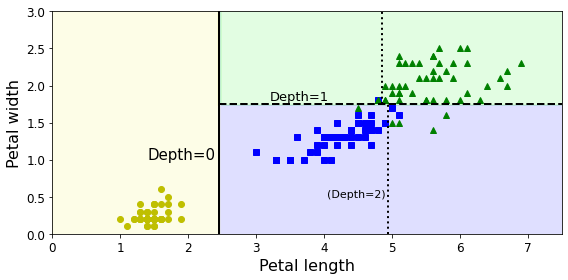

In [4]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True,
                           legend=False ,plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8, cmap=custom_cmap2)
    if iris:
        plt.xlabel("Petal length", fontsize=16)
        plt.ylabel("Petal width", fontsize=16)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", rotation=0, fontsize=18)
    if legend:
        plt.legend(loc="lower right", fontsize=16)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris Virginica")
        plt.axis(axes)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
        
save_fig("Decision tree - Decision boundaries")
plt.plot()

<ul>
    <li>
        <strong>The lefthand</strong> is pure( only Iris Setosa), it can't be split further
        <ul>
            <li><strong>The thick vertical line</strong> represents the decision boundary of the rooth node (depth=0), petal length=2.45cm</li>
            <li>
        </ul>
    </li>
    <li>
        <strong>The rightand</strong> is impure, thus it can be split further
        <ul>
            <li><strong>The depth=1 node</strong> splits the it at petal width=1.75cm (dashed line)</li>
            <li>
                <strong>max_depth=2</strong>, thus the Decision Tree stops after Depth=2. If max_depth=3, then the Depth=2 nodes would each add nother decision boundary (dotted lines)
            </li>
        </ul>
    </li>
</ul>


##### Model interpretation: White box versus black box

Decision Trees are considered <em>white box models</em> because their decisions are easy to interpret. In contrast, Random Forest or Neural Networks are generally considered <em>black box models</em>. They make great predictions, and it's easy to check the calculations that they performed to make predictions. But it's usually hard to explain in simple terms why the predictions were made. I.g, if a NN says that a particular person appears on a picture, it's hard to know what contributed to the prediction: did the model recognize the person's mouth? eyes? nose? etc. Conversely, Decision Trees provide nice, simple classification rules

# End Of Section: Making Predictions

# Section: Estimating Class Probabilites

A Decision Tree can also estimate the probability that an instances belongs to a particular class $k$. For example, a flower whose petals are 5cm long and 1.5cm wide. The corresponding leaf node is the depth=2 left node, thus the Decision Tree outputs the following probabilites:
<ul>
    <li><strong>0%</strong> for Iris Setosa (0/54)</li>
    <li><strong>90.7%</strong> for Iris Versicolor (49/54)</li>
    <li><strong>9.3%</strong> for Iris Virginica (4/54)</li>
</ul>
And if asked to predict a class, it outputs Iris Versicolor (class 1) because it has the highest probablity

In [6]:
tree_clf.predict_proba([[5.0, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

# End Of Section: Estimating Class Probabilites

# Section: The CART Training Algorithm

Scikit Learn uses the <em>Classification and Regressiob Tree</em> (CART) algorithm to train Decision Trees (aka "growing" trees). The algorithm works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$ (e.g "petal length $\le 2.45$ cm").<br>
How does it choose $k$ and $t_k$? <br>
It searches for the pair $\left(k, t_k\right)$ that produces the purest subsets (weighted by their size) <br>
The equation 6-2 gives the cost function the the algorithm tries to minimize

<img src="images/Decision tree - CART cost function for classification.png">

The CART algorithm continues to split the training set recursively. It stops recursing once it reaches the maximum depth (max_depth hyperparameter), or if it can't find a split that will reduce impurity. <br>
Other hyperparameters that control stopping conditions: min_samples_split, min_samples_leaf, min_weight_fraction_leaf and max_leaf_nodes

<strong>Note</strong>, the CART algorithm is a <em>greedy algorithm</em>: it greedily searches for an optimum slpit at the top level, then repeats the process at each subsequent level. It doesn't check whether or not the split will lead to the lowest possible impurity several levels down. <br>
A greedy algorithm produces a solution that's considered good but not guranteed to be optimal.
<br>
<br>
Unfortunately, finding the optimal tree is known to be a <strong>NP-Complete problem:</strong> it requires $O(exp(m))$ time, making the problem intractable even for small training sets

# End Of Section: The CART Training Algorithm

# Section: Computational Complexity

Making predictions requires traversing the Decision Tree from the root to a leaf. So, to traverse the whole tree requires going through roughly $O(log_2(m))$ nodes. Prediction complexity is $O(log_2(m))$ since it only requires checking the value of one feature. Thus, predictions are very fast, even when dealing with large training sets

The training algorithm compares all features (or less if max_features is set) on all samples at each node. Thus, the training complexity is $O(n \times m log_2(m))$. For small training sets (less than a few thousands), Scikit Learn can speed up the training by presorting the data (set pre_sort=True), but doing so with larger training sets will slow down the training considerably

# End Of Section: Computational Complexity

# Section: Gini Impurity Or Entropy?

By default, the Gini impurity measure is used, but it's possible to select the entropy impurity by setting the hyperparameter criterion="entropy". A set's entropy is zero when it contains instances of only one class. <br>
Equation 6-3 shows the definition of the entropy of the $i^{th}$ node. For example, the depth=2 left node in figure 6-1 has an entropy equal to: $-(49/54)log_2(49/54) - (5/54)log_2(5/54) \approx 0.445$

<img src="images/Decision tree - Entropy.png">

Which one to pick? Gini or entropy?<br>
Most of the time it doesn't make a big difference: they lead to similar trees. Gini impurity is slighlty faster to compute, so it's a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

# End Of Section: Gini Impurity Or Entropy?

# Section: Regularization Hyperparameters

When it comes to Decision Trees, they make very few assumptions about the training data (as opposed to linear models, which assume that the data is linear). If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, which increases the chances of overfitting it. <br>
<ul>
    <li>
        Such a model is called a <strong>nonparametric model</strong>, because the number of parameters isn't determined prior to training.
    </li>
    <li>In contrast, <strong>parametric model</strong>, like the linear model, has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting)</li>
</ul>

To reduce overfitting on the Decision Trees, you can regularize the model by setting the hyperparameter max_depth (the default is None). Each algorithm relies on other hyperparameters to regularize them, but max_depth should be a good start

The DecisionTreeClassifier has additional parameters that similarly restrict the shape of the Decision Tree:
<ul>
    <li><strong>min_samples_split</strong> - the minimum number of samples a node must have before it can be split</li>
    <li><strong>min_samples_leaf</strong> - the minimum number of samples a leaf node must have</li>
    <li><strong>min_weight_fraction_leaf</strong> - same as min_samples_leaf but expressed as the fraction of the total number of weighted instances</li>
    <li><strong>max_leaf_nodes</strong> - the maximum number of leaf nodes</li>
    <li><strong>max_features</strong> - the maximum number of features that are evaluated for splitting at each node</li>
</ul>
Increasing min_* or reducing max_* hyperparameters will regularize the model

Let's illustrate two models; an unrestricted model and a restricted model (min_samples_leaf=4)

Saving figure Decision tree - Regularization with min_samples_leaf


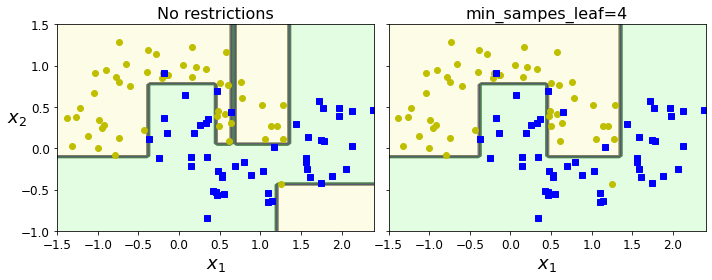

Figure 6-3


In [31]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_sampes_leaf={}".format(deep_tree_clf2.min_samples_leaf), fontsize=16)
plt.ylabel("")

save_fig("Decision tree - Regularization with min_samples_leaf")
plt.show()

print("Figure 6-3")

From figure 6-3 we can conclude that the model to the left if overfitting, and the model on the right will probably generalize better

# End Of Section: Regularization Hyperparameters

# Section: Regression

Decision Trees are also capable of performing regression tasks. We'll be using Scikit Learns DecisionTreeRegressor and training it on a noisy quadratic dataset

In [50]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [51]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [52]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(IMAGE_PATH, "Regression_tree.dot"),
    feature_names=["x1"],
    filled=True,
    rounded=True
)

Figure 6-4


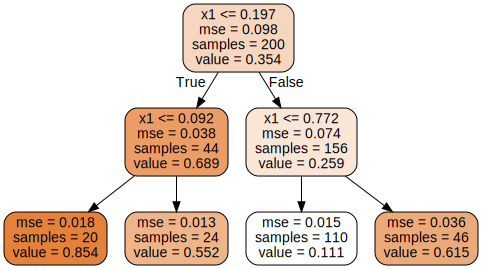

In [57]:
print("Figure 6-4")
Source.from_file(os.path.join(IMAGE_PATH, "Regression_tree.dot"))

The tree is similar to the previous one we've built. The main difference is that instead of predicting a class in each node, it predicts a value. I.g, a instance $x_1 = 0.6$, you start at the root and eventually reach the leaf node that <strong>predicts a value=0.111</strong>. This prediction is the <strong>average of the 110 training instances</strong> associated with the leaf node, and it results in a <strong>mean squared error</strong> equal to 0.015 <strong>over</strong> this 110 instances

The following illustration (figure 6-5) shows the tree that we just discussed on the left and an additional tree with max_depth=3 on the right. We can see that the <strong>predicted value</strong> for each region is always <strong>the average target value</strong> of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value

Saving figure Decision tree - Prediction of regression models


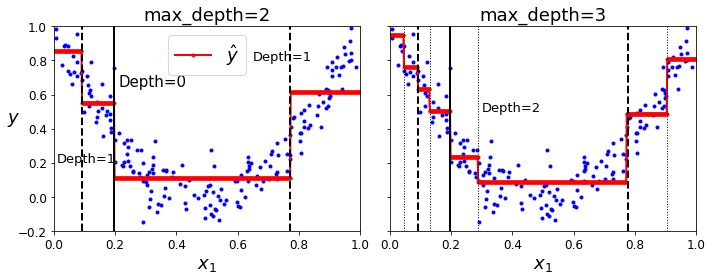

Figure 6-5


In [63]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_clf, X, y, axes=[0, 1, -0.2, 1], 
                                ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_clf.predict(x1)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, rotation=0, fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth={}".format(tree_reg1.max_depth), fontsize=18)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=False)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7778, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth={}".format(tree_reg2.max_depth), fontsize=18)

save_fig("Decision tree - Prediction of regression models")
plt.show()
print("Figure 6-5")

The CART algorithm works mostly the same as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE

<img src="images/Decision tree - Cart cost function for regression.png">

# Section: Instability

##### Sensitivity to training set

In [14]:
X[(X[:, 1]==X[:,1][y==1].max()) & (y==1)] #Widest Iris Versicolor flower

array([[4.8, 1.8]])

In [16]:
not_widest_versicolor = (X[:, 1] != 1.8) | (y==2)

X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure Decision tree instability plot


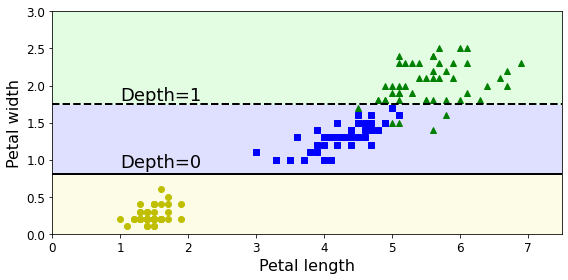

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=18)
plt.text(1.0, 1.8, "Depth=1", fontsize=18)

save_fig("Decision tree instability plot")
plt.show()